# Plots

In [15]:
# Import to be able to import python package from src
import sys
sys.path.insert(0, '../src')

In [16]:
import pandas as pd
import ontime as on
from darts.datasets import EnergyDataset

## Load data

In [17]:
ts = EnergyDataset().load()

Complete TimeSeries

In [18]:
df = ts.pd_dataframe()
df = df.interpolate()
cols = ['generation biomass', 'generation solar', 'generation nuclear']
df = df[cols]

In [19]:
ts = on.TimeSeries.from_dataframe(df)

Prepare data

In [20]:
ts_uni = ts['generation solar'].slice(pd.Timestamp('2015'), pd.Timestamp('2016'))
ts_multi = ts.slice(pd.Timestamp('2015'), pd.Timestamp('2016'))

## Line Plot

With univariate TimeSeries

In [25]:
on.plots.line(ts_uni)

alt.Chart(...)

with multivariate TimeSeries

In [23]:
on.plots.line(ts_multi)

alt.Chart(...)

## Heatmap Plot

with univariate TimeSeries

In [30]:
on.plots.heatmap(ts_uni)

alt.Chart(...)

with multivariate Heatmap

In [31]:
on.plots.heatmap(ts_multi)

alt.Chart(...)

## Prediction Plot

Quickly make a prediction

In [33]:
train, test = ts_uni.split_after(pd.Timestamp('2015-09-01'))
gp = on.context.common.GenericPredictor()
gp.fit(train);
pred = gp.predict(48)

with univariate TimeSeries

In [35]:
on.plots.prediction(train[-96:], pred, test[:48])

alt.Chart(...)

## Anomaly Plot

Quickly detect anomlies

In [55]:
gd = on.context.common.GenericDetector()
gd.fit(train);

detected_test = gd.detect(test)

Plot the initial series and the anomalies

In [53]:
on.plots.anomalies(test[:72], detected_test[:72])

alt.LayerChart(...)

## Activity Plot

with a BinaryTimeSeries, grey squares show the absence of data.

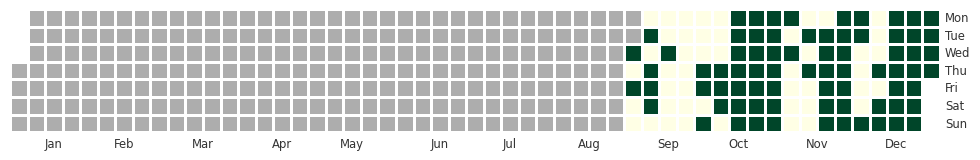

In [64]:
on.plots.activity(detected_test);

with a custom colormaps

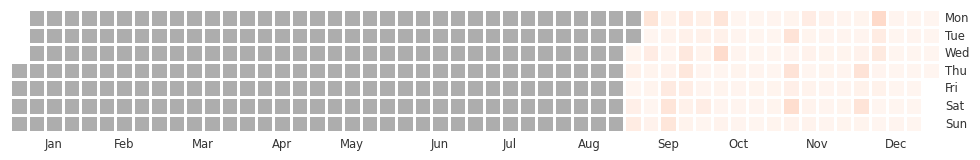

In [67]:
on.plots.activity(test, cmap='Reds');